In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
df_path="./Resources/AGE - household purchases Agg Data.csv"

In [3]:
df_age = pd.read_csv(df_path)

In [4]:
df_age.head ()

,Code,Food Category,Food Group,Major Food Code,Minor Food Code,Age Group,Units,2001-02,2002-03,2003-04,...,2014,2015,201516,201617,201718,201819,RSE indicator(a),% change since 201516,sig(b),trend since 201516(c)
0,cat520,Milk and milk products excluding cheese,NaN,NaN,NaN,30-39,ml,"1,813","1,780","1,776",...,"1,610","1,632","1,637","1,497","1,546","1,599",üü,-2,NaN,NaN
1,4006,NaN,"Liquid wholemilk, including school and welfare",NaN,NaN,30-39,ml,629,593,609,...,335,364,385,320,398,432,NaN,+12,NaN,NaN
2,4,NaN,NaN,"Liquid wholemilk, full price",NaN,30-39,ml,615,572,589,...,335,364,385,320,398,432,NaN,+12,NaN,NaN
3,402,NaN,NaN,NaN,UHT milk,30-39,ml,11,5,11,...,4,8,8,0,9,5,û,-30,NaN,NaN
4,403,NaN,NaN,NaN,Sterilised,30-39,ml,16,11,2,...,0,1,1,0,3,0,û,-100,NaN,NaN


In [5]:
cleandf=df_age.drop(["RSE indicator(a)", "% change since 201516", "sig(b)", "trend since 201516(c)", "Code" ],axis=1)
cleandf

,Food Category,Food Group,Major Food Code,Minor Food Code,Age Group,Units,2001-02,2002-03,2003-04,2004-05,...,2010,2011,2012,2013,2014,2015,201516,201617,201718,201819
0,Milk and milk products excluding cheese,NaN,NaN,NaN,30-39,ml,"1,813","1,780","1,776","1,781",...,"1,638","1,681","1,709","1,648","1,610","1,632","1,637","1,497","1,546","1,599"
1,NaN,"Liquid wholemilk, including school and welfare",NaN,NaN,30-39,ml,629,593,609,565,...,403,404,374,328,335,364,385,320,398,432
2,NaN,NaN,"Liquid wholemilk, full price",NaN,30-39,ml,615,572,589,547,...,403,404,374,328,335,364,385,320,398,432
3,NaN,NaN,NaN,UHT milk,30-39,ml,11,5,11,17,...,8,3,2,3,4,8,8,0,9,5
4,NaN,NaN,NaN,Sterilised,30-39,ml,16,11,2,5,...,0,0,4,0,0,1,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1680,NaN,NaN,Spirits with mixer,NaN,75_and_over,ml,0,1,0,1,...,0,0,1,2,3,1,1,1,2,1
1681,NaN,NaN,Fortified wines,NaN,75_and_over,ml,32,46,40,34,...,24,27,24,24,27,25,28,17,31,14
1682,NaN,NaN,Spirits,NaN,75_and_over,ml,63,61,59,42,...,51,51,55,49,59,58,53,54,73,47
1683,NaN,NaN,Liqueurs and cocktails,NaN,75_and_over,ml,3,7,4,6,...,8,8,5,7,3,9,9,11,11,4


In [6]:
cleandf=cleandf.fillna("--")
cleandf.head(10)

,Food Category,Food Group,Major Food Code,Minor Food Code,Age Group,Units,2001-02,2002-03,2003-04,2004-05,...,2010,2011,2012,2013,2014,2015,201516,201617,201718,201819
0,Milk and milk products excluding cheese,--,--,--,30-39,ml,"1,813","1,780","1,776","1,781",...,"1,638","1,681","1,709","1,648","1,610","1,632","1,637","1,497","1,546","1,599"
1,--,"Liquid wholemilk, including school and welfare",--,--,30-39,ml,629,593,609,565,...,403,404,374,328,335,364,385,320,398,432
2,--,--,"Liquid wholemilk, full price",--,30-39,ml,615,572,589,547,...,403,404,374,328,335,364,385,320,398,432
3,--,--,--,UHT milk,30-39,ml,11,5,11,17,...,8,3,2,3,4,8,8,0,9,5
4,--,--,--,Sterilised,30-39,ml,16,11,2,5,...,0,0,4,0,0,1,1,0,3,0
5,--,--,--,Pasteurised/ homogenised,30-39,ml,588,555,576,525,...,395,401,368,325,330,355,376,320,386,427
6,--,--,School milk (d),--,30-39,ml,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,--,--,Welfare milk(i),--,30-39,ml,13,21,19,18,...,0,0,0,0,0,0,0,0,0,0
8,--,Other milk and cream,--,--,30-39,ml,"1,184","1,187","1,168","1,215",...,"1,235","1,277","1,335","1,320","1,275","1,268","1,253","1,176","1,148","1,167"
9,--,--,Skimmed milks,--,30-39,ml,855,819,801,830,...,852,850,907,851,841,802,793,702,718,660


In [7]:
dropped_df = cleandf[cleandf['Minor Food Code'] != '--']
dropped_df = dropped_df.drop(["Major Food Code", "Food Category", "Food Group","Units"], axis=1)
dropped_df

,Minor Food Code,Age Group,2001-02,2002-03,2003-04,2004-05,2005-06,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,201516,201617,201718,201819
3,UHT milk,30-39,11,5,11,17,11,8,10,10,...,8,3,2,3,4,8,8,0,9,5
4,Sterilised,30-39,16,11,2,5,0,0,0,1,...,0,0,4,0,0,1,1,0,3,0
5,Pasteurised/ homogenised,30-39,588,555,576,525,523,508,428,449,...,395,401,368,325,330,355,376,320,386,427
10,Fully skimmed milk,30-39,94,106,85,89,115,110,117,92,...,96,111,91,106,119,82,88,66,60,77
11,Semi-skimmed milk,30-39,761,713,715,741,765,731,745,740,...,756,739,816,745,722,720,705,636,658,584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1656,"Takeaway ice cream, ice cream products, milksh...",75_and_over,4,2,1,1,0,2,0,2,...,1,0,0,0,1,1,0,0,0,0
1669,Mints,75_and_over,9,12,10,11,10,9,11,11,...,10,7,2,3,2,3,4,5,3,2
1670,Boiled sweets,75_and_over,38,38,39,29,31,30,29,34,...,38,28,40,39,37,34,31,35,31,37
1678,"Champagne, sparkling wines and wine with mixer",75_and_over,3,7,5,9,7,5,4,3,...,10,8,5,10,7,21,20,4,16,8


In [10]:
dropped_df["Age Group"].unique()

array(['30-39', '40-49', '50-64', '65-74', '75_and_over'], dtype=object)

In [13]:
age_group1=dropped_df.loc[(dropped_df["Age Group"]== "30-39")]
age_group1 = age_group1.drop("Age Group",axis=1)
df_year1 = age_group1[["Minor Food Code","2001-02"]]
df_year1 = df_year1[df_year1['2001-02'] != '--']
df_year1["2001-02"] = df_year1["2001-02"].str.replace(",", "")
df_year1["2001-02"] = pd.to_numeric(df_year1["2001-02"])
top_1 = df_year1.sort_values(by = "2001-02", ascending = False).head(5)
top_1=top_1.reset_index(drop=True)
year1_data = top_1["Minor Food Code"]

df_year12 = age_group1[["Minor Food Code","2006"]]
df_year12 = df_year12[df_year12['2006'] != '--']
df_year12["2006"] = df_year12["2006"].str.replace(",", "")
df_year12["2006"] = pd.to_numeric(df_year12["2006"])
top_12 = df_year12.sort_values(by = "2006", ascending = False).head(5)
top_12=top_12.reset_index(drop=True)
year12_data = top_12["Minor Food Code"]

df_year13 = age_group1[["Minor Food Code","2010"]]
df_year13 = df_year13[df_year13['2010'] != '--']
df_year13["2010"] = df_year13["2010"].str.replace(",", "")
df_year13["2010"] = pd.to_numeric(df_year13["2010"])
top_13 = df_year13.sort_values(by = "2010", ascending = False).head(5)
top_13=top_13.reset_index(drop=True)
year13_data = top_13["Minor Food Code"]

df_year14 = age_group1[["Minor Food Code","2014"]]
df_year14 = df_year14[df_year14['2014'] != '--']
df_year14["2014"] = df_year14["2014"].str.replace(",", "")
df_year14["2014"] = pd.to_numeric(df_year14["2014"])
top_14 = df_year14.sort_values(by = "2014", ascending = False).head(5)
top_14=top_14.reset_index(drop=True)
year14_data = top_14["Minor Food Code"]

df_year15 = age_group1[["Minor Food Code","201819"]]
df_year15 = df_year15[df_year15['201819'] != '--']
df_year15["201819"] = df_year15["201819"].str.replace(",", "")
df_year15["201819"] = pd.to_numeric(df_year15["201819"])
top_15 = df_year15.sort_values(by = "201819", ascending = False).head(5)
top_15=top_15.reset_index(drop=True)
year15_data = top_15["Minor Food Code"]

In [16]:
summary_df = pd.DataFrame({"2001-02" : year1_data,
                      "2006" : year12_data,
                      "2010" : year13_data,
                      "2014" : year14_data,
                      "2018-19" : year15_data})

## Summary of the 5 most popular foods/drinks for the age group 30-39

In [17]:
summary_df

,2001-02,2006,2010,2014,2018-19
0,Semi-skimmed milk,Semi-skimmed milk,Semi-skimmed milk,Semi-skimmed milk,Semi-skimmed milk
1,Pasteurised/ homogenised,Pasteurised/ homogenised,Pasteurised/ homogenised,Pasteurised/ homogenised,Pasteurised/ homogenised
2,Table wine,Other fresh potatoes (f),Other fresh potatoes (f),Other fresh potatoes (f),Other fresh potatoes (f)
3,Yoghurt,Table wine,Table wine,Yoghurt,Infant or baby milks - dried
4,Chips - frozen or not frozen,Yoghurt,Yoghurt,Table wine,Yoghurt


In [49]:
#summary_df.plot(kind= "pie", autopct= "%1.2f%%", explode=(0,0.1), title=("Distribution of female versus male mice"))
#plt.show()

In [10]:
age_group3=dropped_df.loc[(dropped_df["Age Group"]== "40-49")]
age_group3 = age_group3.drop("Age Group",axis=1)
df_year3 = age_group3[["Minor Food Code","2001-02"]]
df_year3 = df_year3[df_year3['2001-02'] != '--']
df_year3["2001-02"] = df_year3["2001-02"].str.replace(",", "")
df_year3["2001-02"] = pd.to_numeric(df_year3["2001-02"])
top_3 = df_year3.sort_values(by = "2001-02", ascending = False).head(5)
top_3=top_3.reset_index(drop=True)
year3_data = top_3["Minor Food Code"]

df_year32 = age_group3[["Minor Food Code","2006"]]
df_year32 = df_year32[df_year32['2006'] != '--']
df_year32["2006"] = df_year32["2006"].str.replace(",", "")
df_year32["2006"] = pd.to_numeric(df_year32["2006"])
top_32 = df_year32.sort_values(by = "2006", ascending = False).head(5)
top_32=top_32.reset_index(drop=True)
year32_data = top_32["Minor Food Code"]

df_year33 = age_group3[["Minor Food Code","2010"]]
df_year33 = df_year33[df_year33['2010'] != '--']
df_year33["2010"] = df_year33["2010"].str.replace(",", "")
df_year33["2010"] = pd.to_numeric(df_year33["2010"])
top_33 = df_year33.sort_values(by = "2010", ascending = False).head(5)
top_33=top_33.reset_index(drop=True)
year33_data = top_33["Minor Food Code"]

df_year34 = age_group3[["Minor Food Code","2014"]]
df_year34 = df_year34[df_year34['2014'] != '--']
df_year34["2014"] = df_year34["2014"].str.replace(",", "")
df_year34["2014"] = pd.to_numeric(df_year34["2014"])
top_34 = df_year34.sort_values(by = "2014", ascending = False).head(5)
top_34=top_34.reset_index(drop=True)
year34_data = top_34["Minor Food Code"]

df_year35 = age_group3[["Minor Food Code","201819"]]
df_year35 = df_year35[df_year35['201819'] != '--']
df_year35["201819"] = df_year35["201819"].str.replace(",", "")
df_year35["201819"] = pd.to_numeric(df_year35["201819"])
top_35 = df_year35.sort_values(by = "201819", ascending = False).head(5)
top_35=top_35.reset_index(drop=True)
year35_data = top_35["Minor Food Code"]

In [11]:
summary_df_3 = pd.DataFrame({"2001-02" : year3_data,
                      "2006" : year32_data,
                      "2010" : year33_data,
                      "2014" : year34_data,
                      "2018-19" : year35_data})

## Summary of the 5 most popular foods/drinks for the age group 40-49

In [33]:
summary_df_3

,2001-02,2006,2010,2014,2018-19
0,Semi-skimmed milk,Semi-skimmed milk,Semi-skimmed milk,Semi-skimmed milk,Semi-skimmed milk
1,Pasteurised/ homogenised,Pasteurised/ homogenised,Other fresh potatoes (f),Other fresh potatoes (f),Pasteurised/ homogenised
2,Table wine,Other fresh potatoes (f),Pasteurised/ homogenised,Pasteurised/ homogenised,Other fresh potatoes (f)
3,Yoghurt,Table wine,Table wine,Table wine,Table wine
4,Fully skimmed milk,Yoghurt,Yoghurt,Yoghurt,Yoghurt


In [59]:
age_group4=dropped_df.loc[(dropped_df["Age Group"]== "50-64")]
age_group4 = age_group4.drop("Age Group",axis=1)
df_year4 = age_group4[["Minor Food Code","2001-02"]]
df_year4 = df_year4[df_year4['2001-02'] != '--']
df_year4["2001-02"] = df_year4["2001-02"].str.replace(",", "")
df_year4["2001-02"] = pd.to_numeric(df_year4["2001-02"])
top_4 = df_year4.sort_values(by = "2001-02", ascending = False).head(5)
top_4=top_4.reset_index(drop=True)
year4_data = top_4["Minor Food Code"]

df_year42 = age_group4[["Minor Food Code","2006"]]
df_year42 = df_year42[df_year42['2006'] != '--']
df_year42["2006"] = df_year42["2006"].str.replace(",", "")
df_year42["2006"] = pd.to_numeric(df_year42["2006"])
top_42 = df_year42.sort_values(by = "2006", ascending = False).head(5)
top_42=top_42.reset_index(drop=True)
year42_data = top_42["Minor Food Code"]

df_year43 = age_group4[["Minor Food Code","2010"]]
df_year43 = df_year43[df_year43['2010'] != '--']
df_year43["2010"] = df_year43["2010"].str.replace(",", "")
df_year43["2010"] = pd.to_numeric(df_year43["2010"])
top_43 = df_year43.sort_values(by = "2010", ascending = False).head(5)
top_43=top_43.reset_index(drop=True)
year43_data = top_43["Minor Food Code"]

df_year44 = age_group4[["Minor Food Code","2014"]]
df_year44 = df_year44[df_year44['2014'] != '--']
df_year44["2014"] = df_year44["2014"].str.replace(",", "")
df_year44["2014"] = pd.to_numeric(df_year44["2014"])
top_44 = df_year44.sort_values(by = "2014", ascending = False).head(5)
top_44=top_44.reset_index(drop=True)
year44_data = top_44["Minor Food Code"]

df_year45 = age_group4[["Minor Food Code","201819"]]
df_year45 = df_year45[df_year45['201819'] != '--']
df_year45["201819"] = df_year45["201819"].str.replace(",", "")
df_year45["201819"] = pd.to_numeric(df_year45["201819"])
top_45 = df_year45.sort_values(by = "201819", ascending = False).head(5)
top_45=top_45.reset_index(drop=True)
year45_data = top_45["Minor Food Code"]

In [60]:
summary_df_4 = pd.DataFrame({"2001-02" : year4_data,
                      "2006" : year42_data,
                      "2010" : year43_data,
                      "2014" : year44_data,
                      "2018-19" : year45_data})

## Summary of the 5 most popular foods/drinks for the age group 50-64

In [61]:
summary_df_4

,2001-02,2006,2010,2014,2018-19
0,Semi-skimmed milk,Semi-skimmed milk,Semi-skimmed milk,Semi-skimmed milk,Semi-skimmed milk
1,Pasteurised/ homogenised,Other fresh potatoes (f),Other fresh potatoes (f),Other fresh potatoes (f),Pasteurised/ homogenised
2,Table wine,Pasteurised/ homogenised,Table wine,Table wine,Other fresh potatoes (f)
3,Fully skimmed milk,Table wine,Pasteurised/ homogenised,Yoghurt,Table wine
4,Yoghurt,Yoghurt,Fully skimmed milk,Pasteurised/ homogenised,Fully skimmed milk


In [9]:
age_group2=dropped_df.loc[(dropped_df["Age Group"]== "65-74")]
age_group2 = age_group2.drop("Age Group",axis=1)
df_year2 = age_group2[["Minor Food Code","2001-02"]]
df_year2 = df_year2[df_year2['2001-02'] != '--']
df_year2["2001-02"] = df_year2["2001-02"].str.replace(",", "")
df_year2["2001-02"] = pd.to_numeric(df_year2["2001-02"])
top_2 = df_year2.sort_values(by = "2001-02", ascending = False).head(5)
top_2=top_2.reset_index(drop=True)
year2_data = top_2["Minor Food Code"]

df_year22 = age_group2[["Minor Food Code","2006"]]
df_year22 = df_year22[df_year22['2006'] != '--']
df_year22["2006"] = df_year22["2006"].str.replace(",", "")
df_year22["2006"] = pd.to_numeric(df_year22["2006"])
top_22 = df_year22.sort_values(by = "2006", ascending = False).head(5)
top_22=top_22.reset_index(drop=True)
year22_data = top_22["Minor Food Code"]

df_year23 = age_group2[["Minor Food Code","2010"]]
df_year23 = df_year23[df_year23['2010'] != '--']
df_year23["2010"] = df_year23["2010"].str.replace(",", "")
df_year23["2010"] = pd.to_numeric(df_year23["2010"])
top_23 = df_year23.sort_values(by = "2010", ascending = False).head(5)
top_23=top_23.reset_index(drop=True)
year23_data = top_23["Minor Food Code"]

df_year24 = age_group2[["Minor Food Code","2014"]]
df_year24 = df_year24[df_year24['2014'] != '--']
df_year24["2014"] = df_year24["2014"].str.replace(",", "")
df_year24["2014"] = pd.to_numeric(df_year24["2014"])
top_24 = df_year24.sort_values(by = "2014", ascending = False).head(5)
top_24=top_24.reset_index(drop=True)
year24_data = top_24["Minor Food Code"]

df_year25 = age_group2[["Minor Food Code","201819"]]
df_year25 = df_year25[df_year25['201819'] != '--']
df_year25["201819"] = df_year25["201819"].str.replace(",", "")
df_year25["201819"] = pd.to_numeric(df_year25["201819"])
top_25 = df_year25.sort_values(by = "201819", ascending = False).head(5)
top_25=top_25.reset_index(drop=True)
year25_data = top_25["Minor Food Code"]

In [10]:
summary_df_2 = pd.DataFrame({"2001-02" : year2_data,
                      "2006" : year22_data,
                      "2010" : year23_data,
                      "2014" : year24_data,
                      "2018-19" : year25_data})

## Summary of the 5 most popular foods/drinks for the age group 65-74

In [11]:
summary_df_2

,2001-02,2006,2010,2014,2018-19
0,Semi-skimmed milk,Semi-skimmed milk,Semi-skimmed milk,Semi-skimmed milk,Semi-skimmed milk
1,Pasteurised/ homogenised,Other fresh potatoes (f),Other fresh potatoes (f),Other fresh potatoes (f),Table wine
2,Fully skimmed milk,Pasteurised/ homogenised,Pasteurised/ homogenised,Table wine,Other fresh potatoes (f)
3,"Cakes and pastries, not frozen",Fully skimmed milk,Table wine,Fully skimmed milk,Pasteurised/ homogenised
4,Table wine,Table wine,Fully skimmed milk,Pasteurised/ homogenised,Fully skimmed milk


In [18]:
age_group5=dropped_df.loc[(dropped_df["Age Group"]== "75_and_over")]
age_group5 = age_group5.drop("Age Group",axis=1)
df_year5 = age_group5[["Minor Food Code","2001-02"]]
df_year5 = df_year5[df_year5['2001-02'] != '--']
df_year5["2001-02"] = df_year5["2001-02"].str.replace(",", "")
df_year5["2001-02"] = pd.to_numeric(df_year5["2001-02"])
top_5 = df_year5.sort_values(by = "2001-02", ascending = False).head(5)
top_5=top_5.reset_index(drop=True)
year5_data = top_5["Minor Food Code"]

df_year52 = age_group5[["Minor Food Code","2006"]]
df_year52 = df_year52[df_year52['2006'] != '--']
df_year52["2006"] = df_year52["2006"].str.replace(",", "")
df_year52["2006"] = pd.to_numeric(df_year52["2006"])
top_52 = df_year52.sort_values(by = "2006", ascending = False).head(5)
top_52=top_52.reset_index(drop=True)
year52_data = top_52["Minor Food Code"]

df_year53 = age_group5[["Minor Food Code","2010"]]
df_year53 = df_year53[df_year53['2010'] != '--']
df_year53["2010"] = df_year53["2010"].str.replace(",", "")
df_year53["2010"] = pd.to_numeric(df_year53["2010"])
top_53 = df_year53.sort_values(by = "2010", ascending = False).head(5)
top_53=top_53.reset_index(drop=True)
year53_data = top_53["Minor Food Code"]

df_year54 = age_group5[["Minor Food Code","2014"]]
df_year54 = df_year54[df_year54['2014'] != '--']
df_year54["2014"] = df_year54["2014"].str.replace(",", "")
df_year54["2014"] = pd.to_numeric(df_year54["2014"])
top_54 = df_year54.sort_values(by = "2014", ascending = False).head(5)
top_54=top_54.reset_index(drop=True)
year54_data = top_54["Minor Food Code"]

df_year55 = age_group5[["Minor Food Code","201819"]]
df_year55 = df_year55[df_year55['201819'] != '--']
df_year55["201819"] = df_year55["201819"].str.replace(",", "")
df_year55["201819"] = pd.to_numeric(df_year55["201819"])
top_55 = df_year55.sort_values(by = "201819", ascending = False).head(5)
top_55=top_55.reset_index(drop=True)
year55_data = top_55["Minor Food Code"]

In [47]:
summary_df_5 = pd.DataFrame({"2001-02" : year5_data,
                      "2006" : year52_data,
                      "2010" : year53_data,
                      "2014" : year54_data,
                      "2018-19" : year55_data})

## Summary of the 5 most popular foods/drinks for the age group 75 and over

In [48]:
summary_df_5

,2001-02,2006,2010,2014,2018-19
0,Semi-skimmed milk,Semi-skimmed milk,Semi-skimmed milk,Semi-skimmed milk,Semi-skimmed milk
1,Pasteurised/ homogenised,Pasteurised/ homogenised,Other fresh potatoes (f),Other fresh potatoes (f),Other fresh potatoes (f)
2,"Cakes and pastries, not frozen",Other fresh potatoes (f),Pasteurised/ homogenised,Pasteurised/ homogenised,Table wine
3,Fully skimmed milk,"Cakes and pastries, not frozen",Yoghurt,Yoghurt,Pasteurised/ homogenised
4,Yoghurt,Yoghurt,Table wine,Table wine,Fully skimmed milk


## Let's see the popularity of table wine across the years for all age groups

In [15]:
wine_data = cleandf.loc[(cleandf["Minor Food Code"] == "Table wine")]
wine_groups = wine_data.drop(["Food Category", "Food Group", "Minor Food Code", "Units","Age Group","Major Food Code"], axis=1)
wine_groups=wine_groups.transpose ()
wine_groups.columns =['30-39','40-49','50-64','65-74','75_and_over']
wine_groups['Years'] = wine_groups.index
wine_groups=wine_groups.astype({'30-39': 'int64', '40-49': 'int64', '50-64': 'int64', '65-74': 'int64', '75_and_over':'int64' })
wine_groups

,30-39,40-49,50-64,65-74,75_and_over,Years
2001-02,196,223,286,194,132,2001-02
2002-03,172,230,287,209,135,2002-03
2003-04,198,211,311,247,168,2003-04
2004-05,193,217,355,251,159,2004-05
2005-06,181,239,320,286,207,2005-06
2006,214,230,302,269,147,2006
2007,192,248,339,287,149,2007
2008,169,219,305,312,155,2008
2009,170,231,328,253,210,2009
2010,169,231,312,301,208,2010


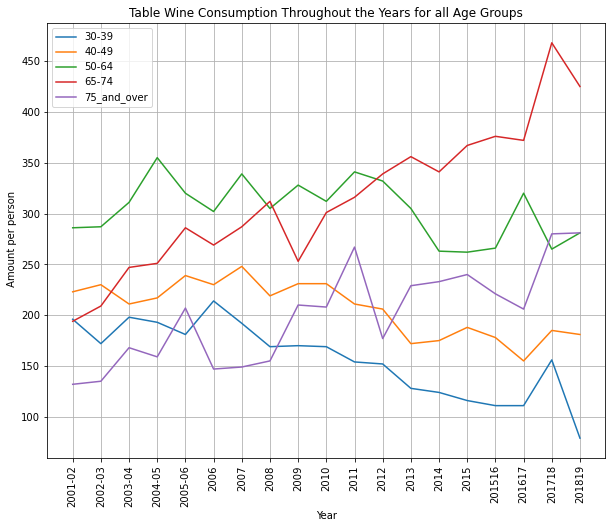

In [16]:
years_data_wine = wine_groups["Years"]

ln1,plot=plt.subplots(figsize=(10, 8))
plt.plot(years_data_wine,wine_groups['30-39'])
plt.plot(years_data_wine,wine_groups['40-49'])
plt.plot(years_data_wine,wine_groups['50-64'])
plt.plot(years_data_wine,wine_groups['65-74'])
plt.plot(years_data_wine,wine_groups['75_and_over'])
plt.legend (["30-39", "40-49", "50-64", "65-74", "75_and_over"], loc ="upper left")
plt.xticks(rotation=90)
plt.grid(True)
plt.xlabel("Year")
plt.ylabel(" Amount per person")
plt.title("Table Wine Consumption Throughout the Years for all Age Groups")
plt.show()

## Let's see the popularity of baby milks across the years for all age groups

In [17]:
milk_data = cleandf.loc[(cleandf["Minor Food Code"] == "Infant or baby milks - dried")]
milk_groups = milk_data.drop(["Food Category", "Food Group", "Minor Food Code", "Units","Age Group","Major Food Code"], axis=1)
milk_groups=milk_groups.transpose ()
milk_groups.columns =['30-39','40-49','50-64','65-74','75_and_over']
milk_groups['Years'] = milk_groups.index
milk_groups=milk_groups.astype({'30-39': 'int64', '40-49': 'int64', '50-64': 'int64', '65-74': 'int64', '75_and_over':'int64' })

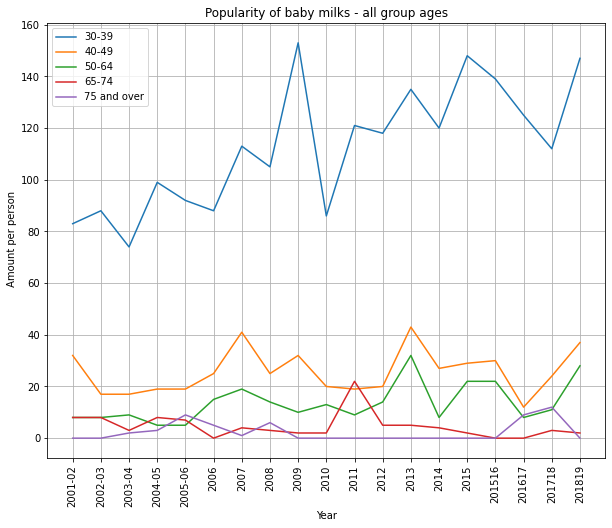

In [18]:
years_data_milk = milk_groups["Years"]

ln1,plot=plt.subplots(figsize=(10, 8))
plt.plot(years_data_milk,milk_groups['30-39'])
plt.plot(years_data_milk,milk_groups['40-49'])
plt.plot(years_data_milk,milk_groups['50-64'])
plt.plot(years_data_milk,milk_groups['65-74'])
plt.plot(years_data_milk,milk_groups['75_and_over'])
plt.legend (["30-39", "40-49", "50-64", "65-74", "75 and over"],loc ="upper left")
plt.xticks(rotation=90)
plt.grid(True)
plt.xlabel("Year")
plt.ylabel(" Amount per person")
plt.title("Popularity of baby milks - all group ages")
plt.show()

In [12]:
plt.savefig('figure_1.jpg', dpi=300)

<Figure size 432x288 with 0 Axes>